In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/sports-data-pipeline

/content/drive/MyDrive/sports-data-pipeline


In [3]:
# @title Install required libraries
!pip install pandas matplotlib seaborn plotly

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [4]:
# @title Upload the csv file

from google.colab import files
uploaded = files.upload()

Saving appearances.csv to appearances.csv


In [5]:
# @title Load dataset
df = pd.read_csv("appearances.csv")
print(" Shape:", df.shape)


 Shape: (1706806, 13)


In [6]:
# @title Data Head
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


### **Data Cleaning & Preprocessing**

In [7]:
# @title Convert date column
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [8]:
# @title Drop null rows in key fields
df = df.dropna(subset=["player_id", "minutes_played", "date", "player_name"])

In [9]:
# @title Ensure minutes_played is numeric
df["minutes_played"] = pd.to_numeric(df["minutes_played"], errors="coerce").fillna(0)
df = df[df["minutes_played"] > 0]

In [10]:
# @title Fill missing values for cards, goals, assists with 0
for col in ["yellow_cards", "red_cards", "goals", "assists"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

In [11]:
 # @title Drop duplicates
df.drop_duplicates(subset=["appearance_id"], inplace=True)

In [12]:
# @title Final check
print(" Cleaned Data:", df.shape)
df.head()

 Cleaned Data: (1706800, 13)


,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


## **Exploratory Data Analysis (EDA)**


/tmp/ipython-input-13-1934401979.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="Greens_r")


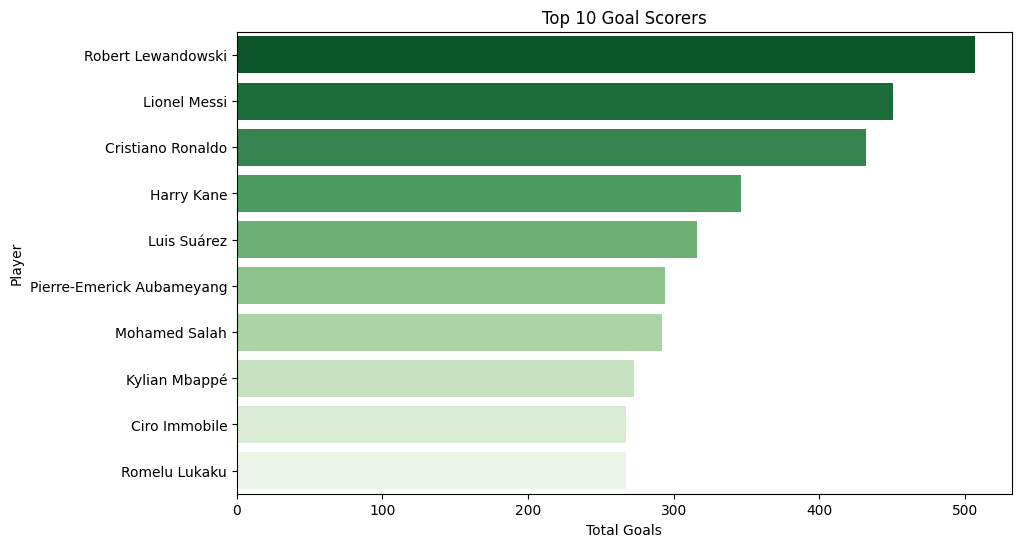

In [13]:
# @title Top 10 Goal Scorers


top_scorers = df.groupby("player_name")["goals"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="Greens_r")
plt.title("Top 10 Goal Scorers")
plt.xlabel("Total Goals")
plt.ylabel("Player")
plt.show()

/tmp/ipython-input-14-2956880226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_assists.values, y=top_assists.index, palette="Blues_r")


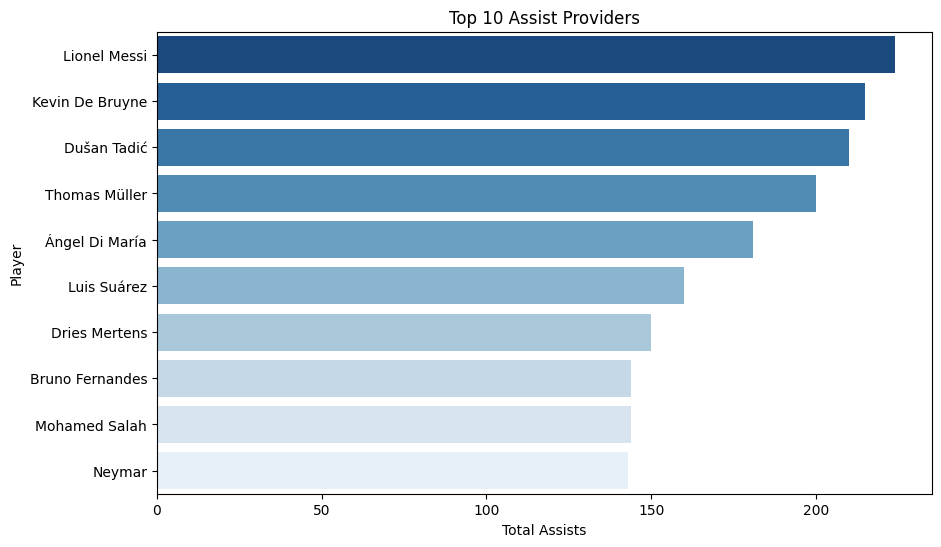

In [14]:
# @title Top 10 Assist Providers

top_assists = df.groupby("player_name")["assists"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_assists.values, y=top_assists.index, palette="Blues_r")
plt.title("Top 10 Assist Providers")
plt.xlabel("Total Assists")
plt.ylabel("Player")
plt.show()


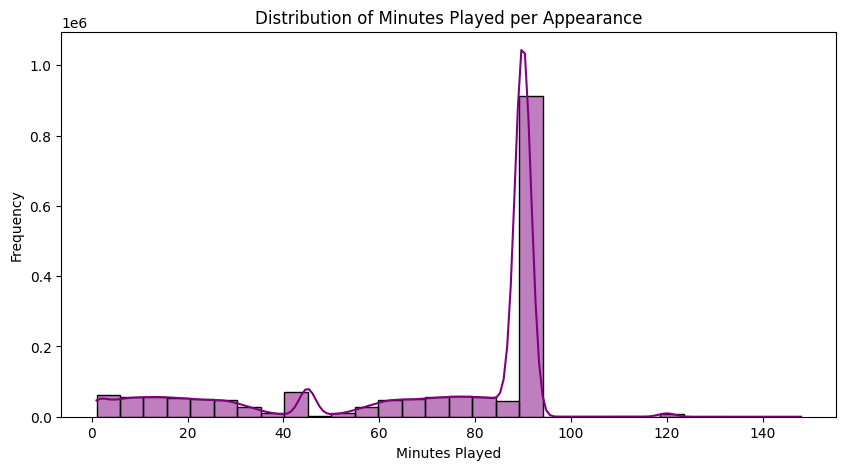

In [15]:
# @title Minutes Played Distribution

plt.figure(figsize=(10,5))
sns.histplot(df["minutes_played"], bins=30, kde=True, color="purple")
plt.title("Distribution of Minutes Played per Appearance")
plt.xlabel("Minutes Played")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-16-1771213283.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=card_leaders.values, y=card_leaders.index, palette="Oranges_r")


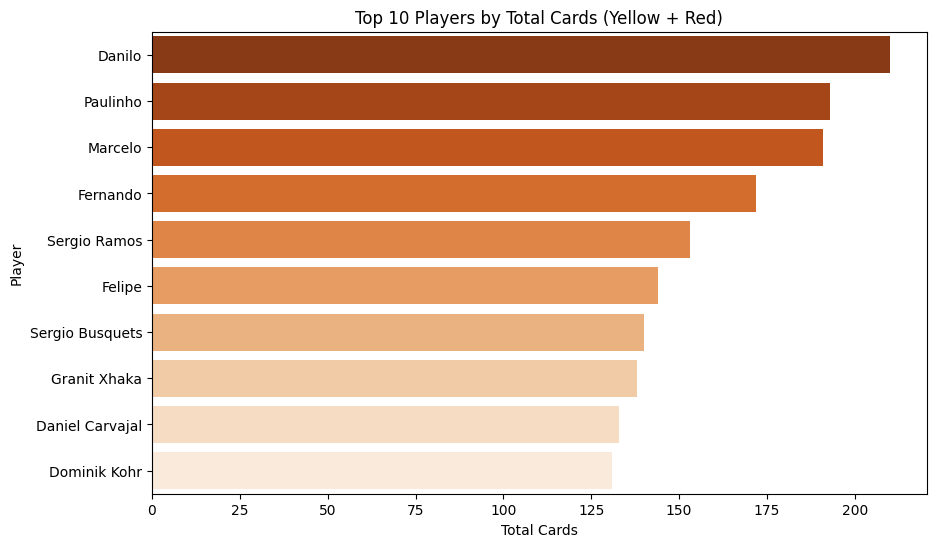

In [16]:
# @title Total Cards (Yellow + Red) by Player

df["total_cards"] = df["yellow_cards"] + df["red_cards"]
card_leaders = df.groupby("player_name")["total_cards"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=card_leaders.values, y=card_leaders.index, palette="Oranges_r")
plt.title("Top 10 Players by Total Cards (Yellow + Red)")
plt.xlabel("Total Cards")
plt.ylabel("Player")
plt.show()

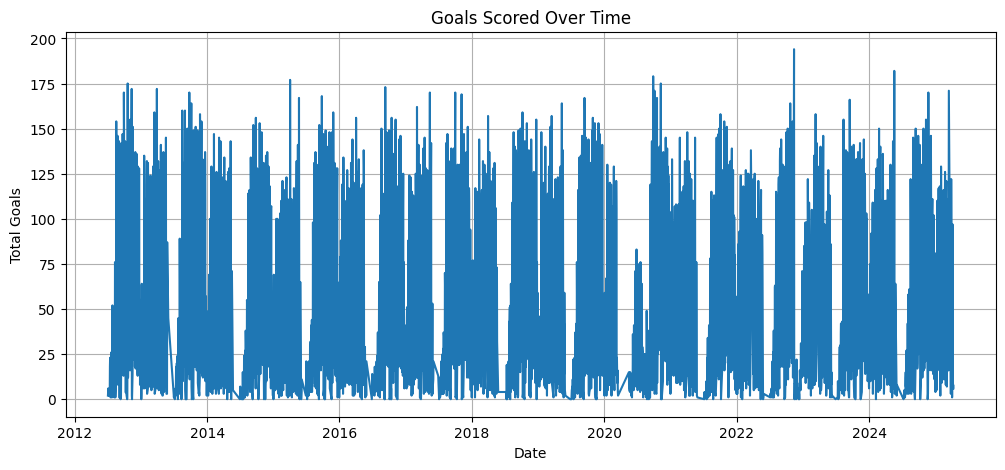

In [17]:
# @title Goals Over Time (Trend)

goals_over_time = df.groupby("date")["goals"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=goals_over_time, x="date", y="goals")
plt.title("Goals Scored Over Time")
plt.xlabel("Date")
plt.ylabel("Total Goals")
plt.grid(True)
plt.show()

/tmp/ipython-input-18-2652433808.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=club_scorers.values, y=club_scorers.index, palette="YlGnBu")


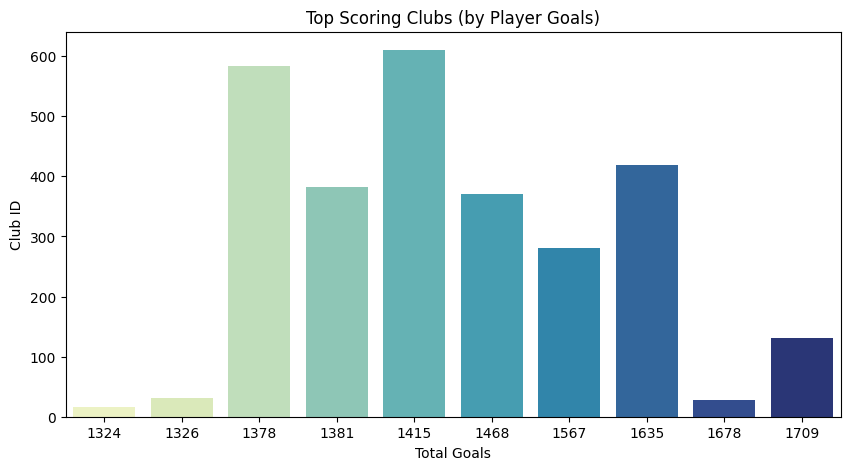

In [18]:
# @title Club-Wise Top Scorers (Optional Bonus)

club_scorers = df.groupby("player_club_id")["goals"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=club_scorers.values, y=club_scorers.index, palette="YlGnBu")
plt.title("Top Scoring Clubs (by Player Goals)")
plt.xlabel("Total Goals")
plt.ylabel("Club ID")
plt.show()

### **Create Target Column for ML**

In [19]:
# @title Target: Did the player score in this appearance?
df["scored"] = (df["goals"] > 0).astype(int)
print(df["scored"].value_counts())


scored
0    1560440
1     146360
Name: count, dtype: int64


In [20]:
# @title Prepare Features

features = ["minutes_played", "assists", "yellow_cards", "red_cards"]
X = df[features]
y = df["scored"]



In [21]:
# @title Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", len(X_train), "| Test size:", len(X_test))

Train size: 1365440 | Test size: 341360


In [22]:
# @title Train ML Model & Predict
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
# @title Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Accuracy:", accuracy_score(y_test, y_pred)*100)


 Accuracy: 91.32587297867354


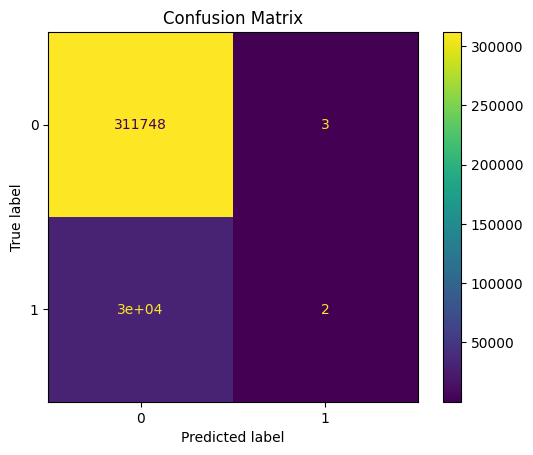

In [24]:
# @title Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

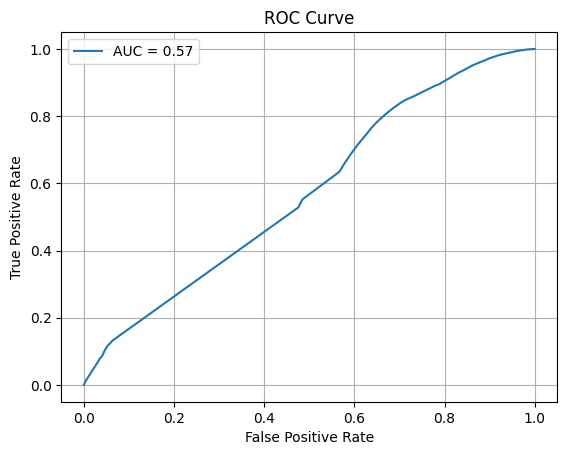

In [25]:
# @title ROC Curve


from sklearn.metrics import roc_curve, auc
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [26]:
# @title Classification Report
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    311751
           1       0.40      0.00      0.00     29609

    accuracy                           0.91    341360
   macro avg       0.66      0.50      0.48    341360
weighted avg       0.87      0.91      0.87    341360



In [27]:
# @title Save Final CSV for Submission


df.to_csv("cleaned_appearances_with_scored.csv", index=False)
print("Final dataset saved with shape:", df.shape)

Final dataset saved with shape: (1706800, 15)
